In [1]:
# Source: https://gist.github.com/yehjames/
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("feature_names: " + str(iris['feature_names']))
print("target_names: " + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
# Use isin to filter data 
# In this case, we only retrieve data with target value 0 and 1
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print (type(X_train))
print (X_train.head(5))
X_train_std[0]

<class 'pandas.core.frame.DataFrame'>
    sepal length (cm)  petal length (cm)
43                5.0                1.6
62                6.0                4.0
3                 4.6                1.5
71                6.1                4.0
45                4.8                1.4


array([-0.78865971, -0.8836167 ])

In [10]:
from sklearn.svm import SVC

In [11]:
# "probability estimates" must be enabled prior to calling fit,
# and will slow down that method.
svm = SVC(kernel='linear', probability = True)

In [12]:
svm.fit(X_train_std, y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [14]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [15]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error += 1
print(error)

0


In [16]:
svm.predict_proba(X_test_std)

array([[0.96122563, 0.03877437],
       [0.00589559, 0.99410441],
       [0.98072342, 0.01927658],
       [0.00504605, 0.99495395],
       [0.01382663, 0.98617337],
       [0.11122981, 0.88877019],
       [0.98883863, 0.01116137],
       [0.00369527, 0.99630473],
       [0.00688714, 0.99311286],
       [0.01279978, 0.98720022],
       [0.02030761, 0.97969239],
       [0.02553842, 0.97446158],
       [0.00637223, 0.99362777],
       [0.98589131, 0.01410869],
       [0.97155419, 0.02844581],
       [0.9547685 , 0.0452315 ],
       [0.9918353 , 0.0081647 ],
       [0.89546166, 0.10453834],
       [0.98589132, 0.01410868],
       [0.96678133, 0.03321867]])

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

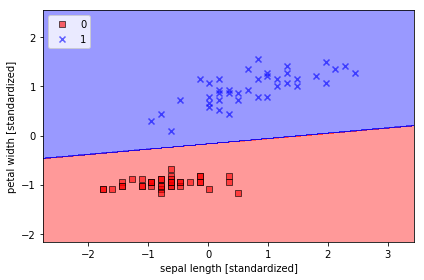

In [20]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()